In [1059]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# READ DATA

In [1061]:
data = pd.read_csv('online_shoppers_intention.csv')
data

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


# DATA UNDERSTANDING

In [1063]:
data["Month"].unique()

array(['Feb', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep',
       'Dec'], dtype=object)

In [1064]:
data["VisitorType"].unique()

array(['Returning_Visitor', 'New_Visitor', 'Other'], dtype=object)

In [1065]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [1066]:
data.tail()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False
12329,0,0.0,0,0.0,3,21.250000,0.000000,0.066667,0.000000,0.0,Nov,3,2,1,2,New_Visitor,True,False


In [1067]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [1068]:
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [1069]:
data.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [1070]:
data.duplicated().sum()

125

In [1071]:
data.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [1072]:
data['Revenue'].value_counts()

Revenue
False    10422
True      1908
Name: count, dtype: int64

# eda (EXPLORATORY DATA ANALYSIS)

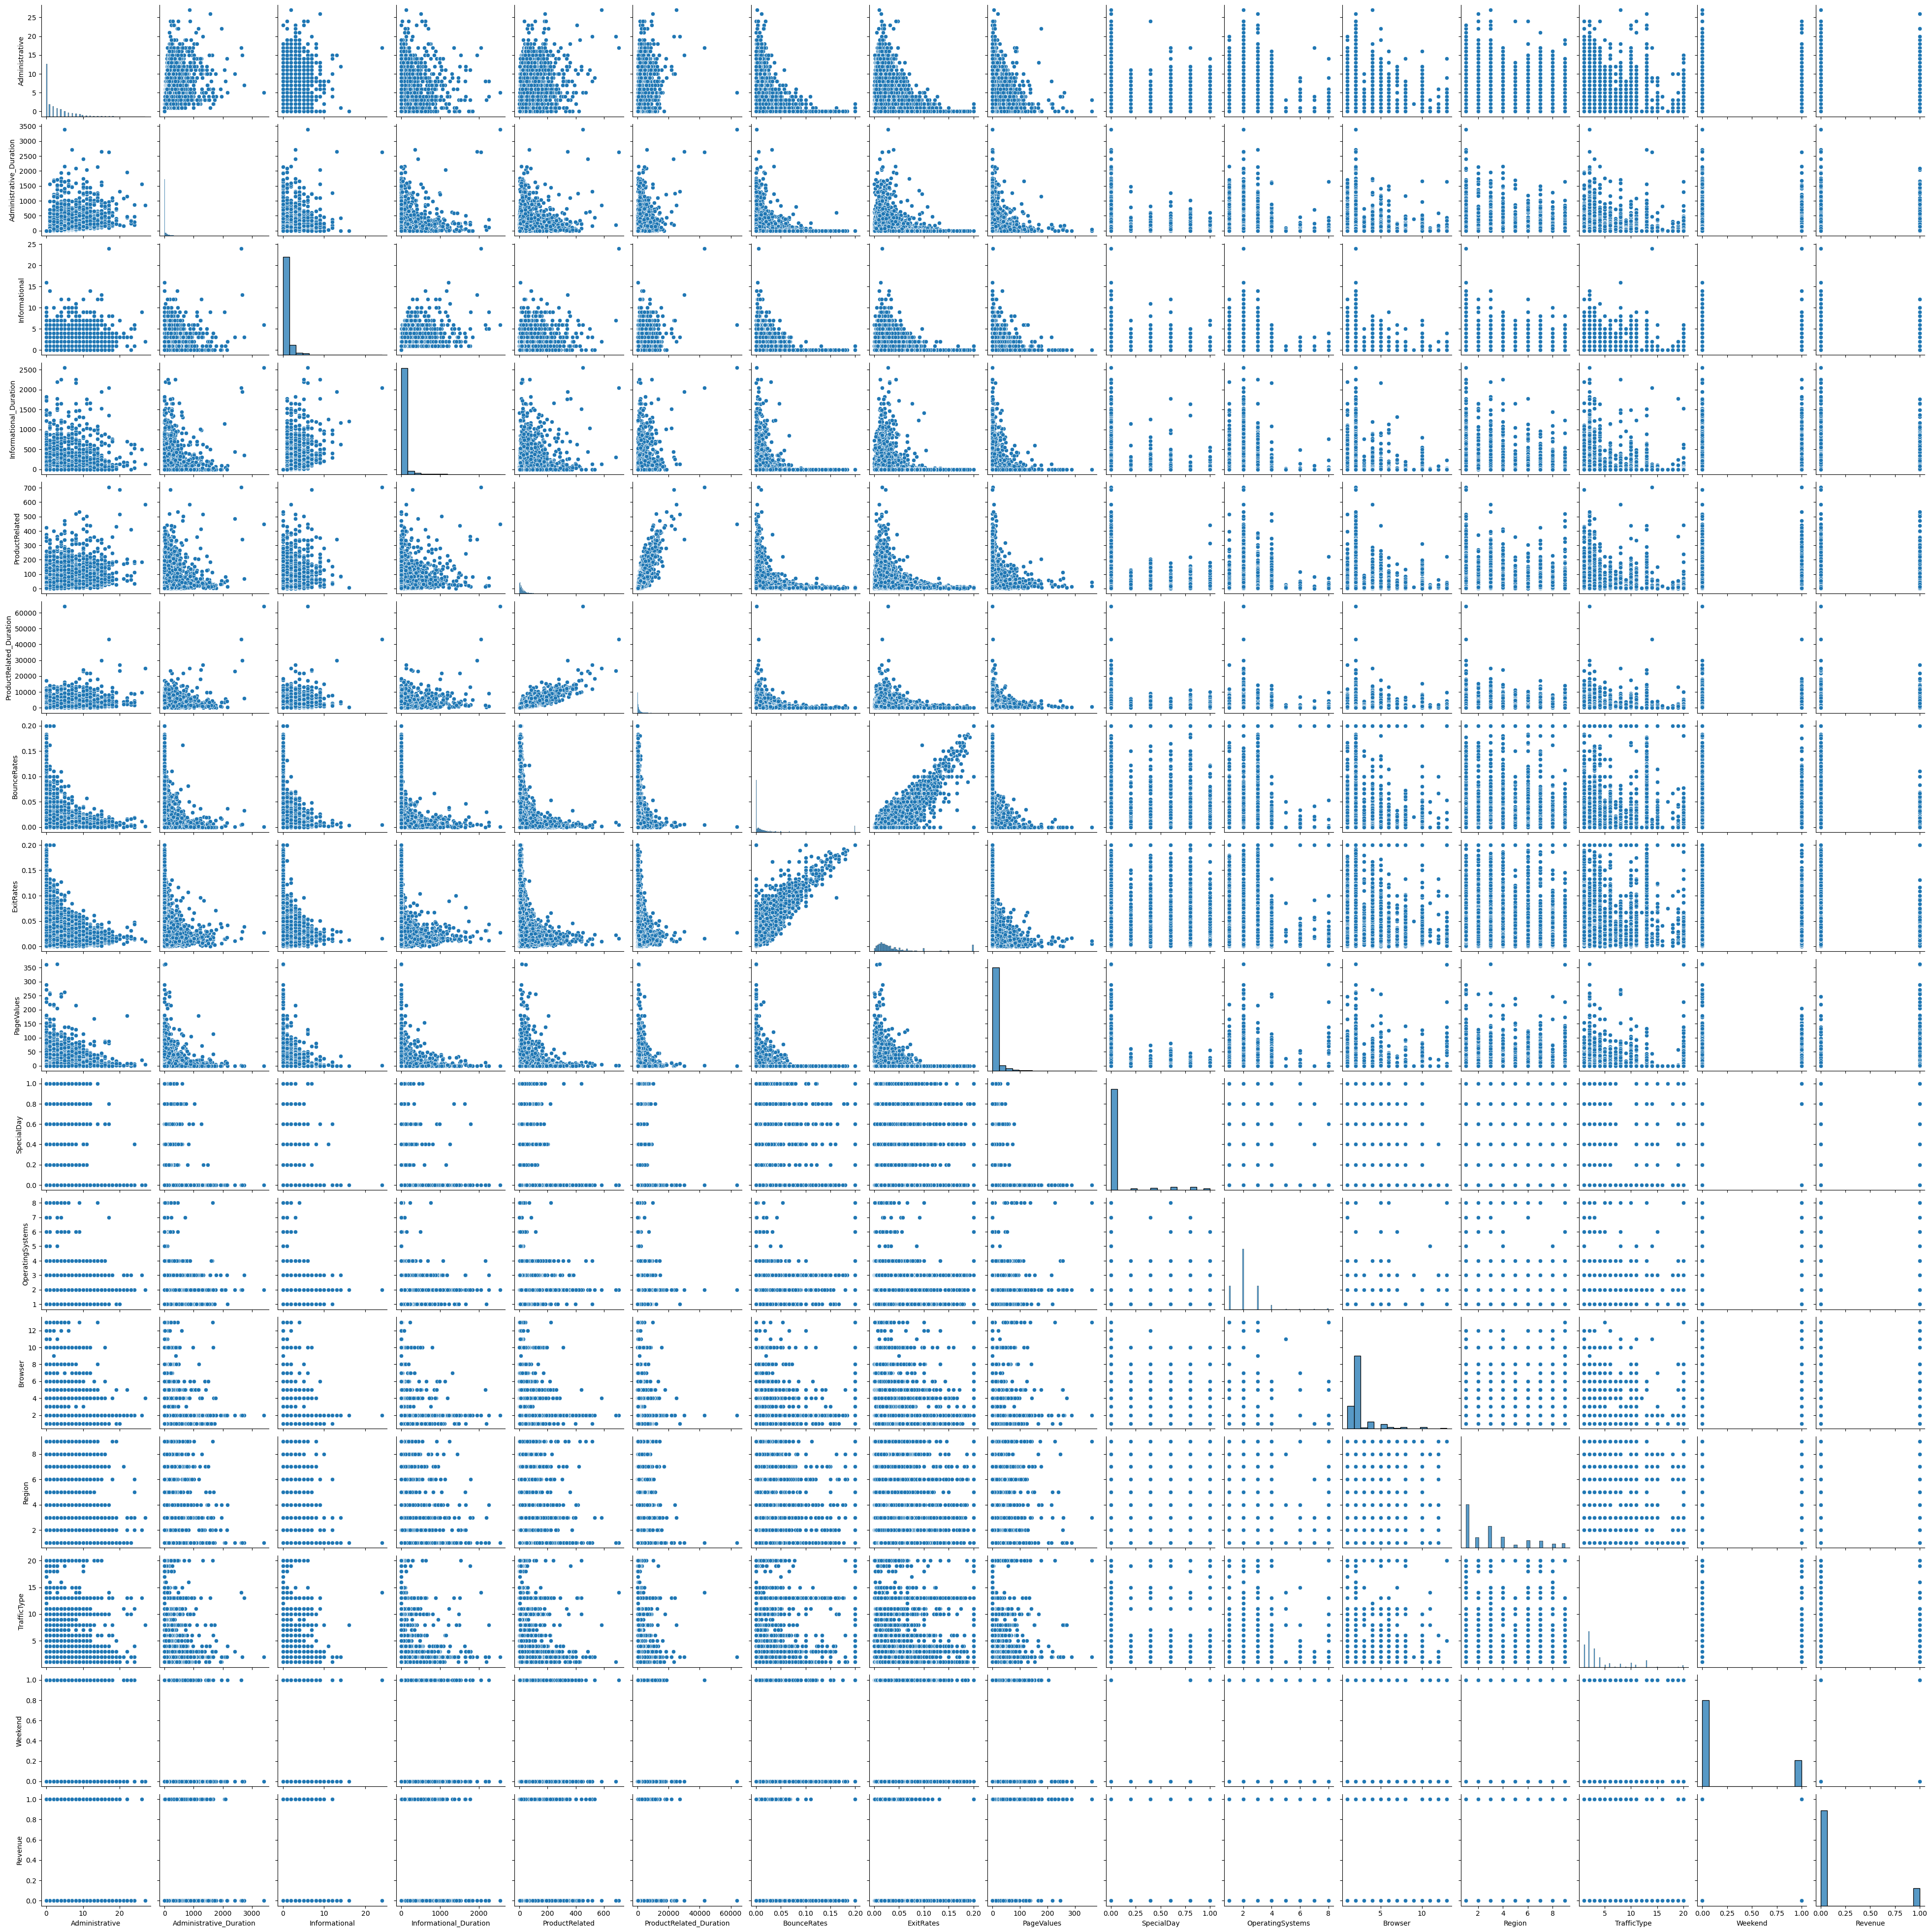

In [1076]:
sns.pairplot(data)

<Axes: >

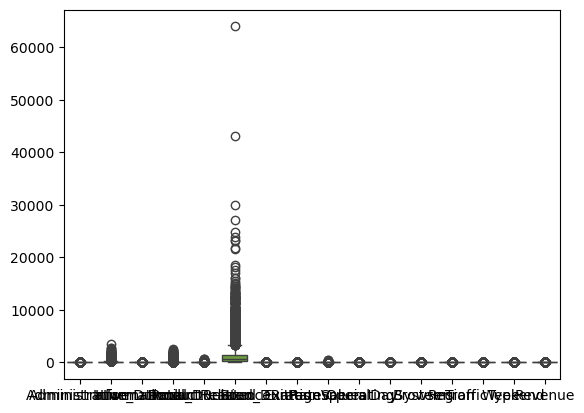

In [1077]:
sns.boxplot(data)

# REPLACING OUTLIERS

<Axes: >

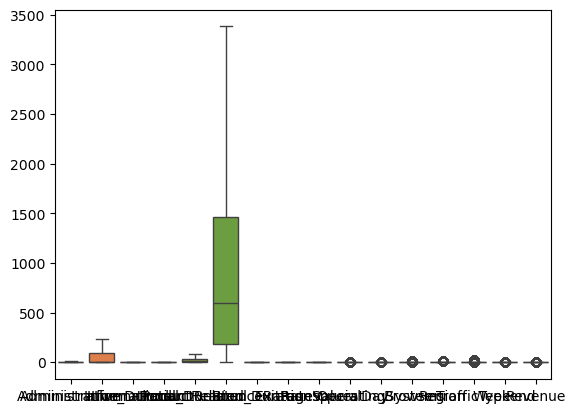

In [1079]:
outliers=['Administrative_Duration','Informational_Duration','ProductRelated_Duration', 'BounceRates','ExitRates','PageValues','Administrative','Informational','ProductRelated']

for i in outliers:
    Q1=data[i].quantile(0.25)
    Q3=data[i].quantile(0.75)
    IQR=Q3-Q1
    lb=Q1-1.5*IQR
    ub=Q3+1.5*IQR
    data.loc [(data[i]>=ub),i]=ub
    data.loc [(data[i]<=lb),i]=lb
sns.boxplot(data)
 

# ENCODING

In [1081]:
le1=LabelEncoder()
data["Month"]=le1.fit_transform(data["Month"])
le2=LabelEncoder()
data["VisitorType"]=le2.fit_transform(data["VisitorType"])
le3=LabelEncoder()
data["Weekend"]=le3.fit_transform(data["Weekend"])
le4=LabelEncoder()
data["Revenue"]=le4.fit_transform(data["Revenue"])
data

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1.0,0.000000,0.042031,0.103571,0.0,0.0,2,1,1,1,1,2,0,0
1,0,0.0,0,0.0,2.0,64.000000,0.000000,0.100000,0.0,0.0,2,2,2,1,2,2,0,0
2,0,0.0,0,0.0,1.0,0.000000,0.042031,0.103571,0.0,0.0,2,4,1,9,3,2,0,0
3,0,0.0,0,0.0,2.0,2.666667,0.042031,0.103571,0.0,0.0,2,3,2,2,4,2,0,0
4,0,0.0,0,0.0,10.0,627.500000,0.020000,0.050000,0.0,0.0,2,3,3,1,4,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53.0,1783.791667,0.007143,0.029031,0.0,0.0,1,4,6,1,1,2,1,0
12326,0,0.0,0,0.0,5.0,465.750000,0.000000,0.021333,0.0,0.0,7,3,2,1,8,2,1,0
12327,0,0.0,0,0.0,6.0,184.250000,0.042031,0.086667,0.0,0.0,7,3,2,1,13,2,1,0
12328,4,75.0,0,0.0,15.0,346.000000,0.000000,0.021053,0.0,0.0,7,2,2,3,11,2,0,0


# X,Y SEPERATION

In [1083]:
x=data.drop("Revenue", axis=1)
y=data["Revenue"]

In [1084]:
x

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0,0.0,0,0.0,1.0,0.000000,0.042031,0.103571,0.0,0.0,2,1,1,1,1,2,0
1,0,0.0,0,0.0,2.0,64.000000,0.000000,0.100000,0.0,0.0,2,2,2,1,2,2,0
2,0,0.0,0,0.0,1.0,0.000000,0.042031,0.103571,0.0,0.0,2,4,1,9,3,2,0
3,0,0.0,0,0.0,2.0,2.666667,0.042031,0.103571,0.0,0.0,2,3,2,2,4,2,0
4,0,0.0,0,0.0,10.0,627.500000,0.020000,0.050000,0.0,0.0,2,3,3,1,4,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53.0,1783.791667,0.007143,0.029031,0.0,0.0,1,4,6,1,1,2,1
12326,0,0.0,0,0.0,5.0,465.750000,0.000000,0.021333,0.0,0.0,7,3,2,1,8,2,1
12327,0,0.0,0,0.0,6.0,184.250000,0.042031,0.086667,0.0,0.0,7,3,2,1,13,2,1
12328,4,75.0,0,0.0,15.0,346.000000,0.000000,0.021053,0.0,0.0,7,2,2,3,11,2,0


In [1085]:
y

0        0
1        0
2        0
3        0
4        0
        ..
12325    0
12326    0
12327    0
12328    0
12329    0
Name: Revenue, Length: 12330, dtype: int64

# SCALING

In [1087]:
scaler=StandardScaler()
x_new=scaler.fit_transform(x)
x_new

array([[-0.75184584, -0.71892194,  0.        , ..., -0.76262903,
         0.40778643, -0.55055169],
       [-0.75184584, -0.71892194,  0.        , ..., -0.51418219,
         0.40778643, -0.55055169],
       [-0.75184584, -0.71892194,  0.        , ..., -0.26573535,
         0.40778643, -0.55055169],
       ...,
       [-0.75184584, -0.71892194,  0.        , ...,  2.21873304,
         0.40778643,  1.81635987],
       [ 0.61590293,  0.22747999,  0.        , ...,  1.72183936,
         0.40778643, -0.55055169],
       [-0.75184584, -0.71892194,  0.        , ..., -0.51418219,
        -2.48769683,  1.81635987]])

# TRAIN-TEST-SPLIT

In [1089]:
x_new_train,x_new_test,y_train,y_test=train_test_split(x_new,y,test_size=.3,random_state=42)

# LOGISTIC REGRESSION

In [1091]:
model=LogisticRegression()
model.fit(x_new_train,y_train)

LogisticRegression()

In [1092]:
train_pred=model.predict(x_new_train)
train_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [1093]:
test_pred=model.predict(x_new_test)
test_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [1094]:
score=accuracy_score(train_pred,y_train)
score

0.8461360213185031

In [1095]:
score1=accuracy_score(test_pred,y_test)
score1

0.8434712084347121

In [1096]:
cm=confusion_matrix(train_pred,y_train)
cm

array([[7288, 1318],
       [  10,   15]], dtype=int64)

In [1097]:
cr=classification_report(train_pred,y_train)

# DECISIONTREE CLASSIFIER

In [1099]:
model1=DecisionTreeClassifier()
model1.fit(x_new_train,y_train)

DecisionTreeClassifier()

In [1100]:
train_pred1=model1.predict(x_new_train)
train_pred1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [1101]:
test_pred1=model1.predict(x_new_test)
test_pred1

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

In [1102]:
score2=accuracy_score(train_pred1,y_train)
score2

1.0

In [1103]:
score3=accuracy_score(test_pred1,y_test)
score3

0.76588267099216

In [1104]:
cm2=confusion_matrix(train_pred1,y_train)
cm

array([[7288, 1318],
       [  10,   15]], dtype=int64)

In [1105]:
cr2=classification_report(train_pred1,y_train)
print(cr)

              precision    recall  f1-score   support

           0       1.00      0.85      0.92      8606
           1       0.01      0.60      0.02        25

    accuracy                           0.85      8631
   macro avg       0.50      0.72      0.47      8631
weighted avg       1.00      0.85      0.91      8631



# RANDOMFOREST CLASSIFIER

In [1107]:
model2=RandomForestClassifier()
model2.fit(x_new_train,y_train)

RandomForestClassifier()

In [1108]:
train_pred2=model2.predict(x_new_train)
train_pred2

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [1109]:
test_pred2=model2.predict(x_new_test)
test_pred2

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [1110]:
score4=accuracy_score(train_pred2,y_train)
score4

1.0

In [1111]:
score5=accuracy_score(test_pred2,y_test)
score5

0.8480670451473371

In [1112]:
cm3=confusion_matrix(train_pred2,y_train)
cm

array([[7288, 1318],
       [  10,   15]], dtype=int64)

In [1113]:
cr3=classification_report(train_pred2,y_train)
print(cr)

              precision    recall  f1-score   support

           0       1.00      0.85      0.92      8606
           1       0.01      0.60      0.02        25

    accuracy                           0.85      8631
   macro avg       0.50      0.72      0.47      8631
weighted avg       1.00      0.85      0.91      8631



# ADABOOST CLASSIFIER

In [1115]:
model3=AdaBoostClassifier()
model3.fit(x_new_train,y_train)

AdaBoostClassifier()

In [1116]:
train_pred3=model3.predict(x_new_train)
train_pred3

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [1117]:
test_pred3=model3.predict(x_new_test)
test_pred3

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [1118]:
score6=accuracy_score(train_pred3,y_train)
score6

0.8450932684509327

In [1119]:
score7=accuracy_score(test_pred3,y_test)
score7

0.8448229251148959

In [1120]:
cm4=confusion_matrix(train_pred3,y_train)
cm4


array([[7225, 1264],
       [  73,   69]], dtype=int64)

In [1121]:
cr4=classification_report(train_pred3,y_train)
print(cr4)

              precision    recall  f1-score   support

           0       0.99      0.85      0.92      8489
           1       0.05      0.49      0.09       142

    accuracy                           0.85      8631
   macro avg       0.52      0.67      0.50      8631
weighted avg       0.97      0.85      0.90      8631



# GRADIENTBOOSTING CLASSIFIER

In [1123]:
model4=GradientBoostingClassifier()
model4.fit(x_new_train,y_train)

GradientBoostingClassifier()

In [1124]:
train_pred4=model4.predict(x_new_train)
train_pred4

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [1125]:
test_pred4=model4.predict(x_new_test)
test_pred4

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [1126]:
score8=accuracy_score(train_pred4,y_train)
score8

0.8555207971266365

In [1127]:

score9=accuracy_score(test_pred4,y_test)
score9

0.8442822384428224

In [1128]:
cm5=confusion_matrix(train_pred4,y_train)
cm5

array([[7256, 1205],
       [  42,  128]], dtype=int64)

In [1129]:
cr5=classification_report(train_pred4,y_train)
print(cr5)

              precision    recall  f1-score   support

           0       0.99      0.86      0.92      8461
           1       0.10      0.75      0.17       170

    accuracy                           0.86      8631
   macro avg       0.55      0.81      0.55      8631
weighted avg       0.98      0.86      0.91      8631



# XGB CLASSIFIER

In [1131]:
model5=XGBClassifier()
model5.fit(x_new_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [1132]:
train_pred5=model5.predict(x_new_train)
train_pred5

array([0, 0, 0, ..., 0, 0, 0])

In [1133]:
test_pred5=model5.predict(x_new_test)
test_pred5

array([1, 0, 1, ..., 0, 0, 0])

In [1134]:
score10=accuracy_score(train_pred5,y_train)
score10

0.9664001853782875

In [1135]:
score11=accuracy_score(test_pred5,y_test)
score11

0.8313057583130575

In [1136]:
cm6=confusion_matrix(train_pred5,y_train)
cm6

array([[7273,  265],
       [  25, 1068]], dtype=int64)

In [1137]:
cr6=classification_report(train_pred5,y_train)
print(cr6)

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      7538
           1       0.80      0.98      0.88      1093

    accuracy                           0.97      8631
   macro avg       0.90      0.97      0.93      8631
weighted avg       0.97      0.97      0.97      8631



# knn



In [1139]:
model6=KNeighborsClassifier(n_neighbors=10)
model6.fit(x_new_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [1140]:
train_pred6=model6.predict(x_new_train)
train_pred6

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [1141]:
test_pred6=model6.predict(x_new_test)
test_pred6

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [1142]:
score12=accuracy_score(train_pred6,y_train)
score12

0.8493801413509443

In [1143]:
score13=accuracy_score(test_pred6,y_test)
score13

0.8442822384428224

In [1144]:
cm7=confusion_matrix(train_pred6,y_train)
cm7

array([[7211, 1213],
       [  87,  120]], dtype=int64)

In [1145]:
cr7=classification_report(train_pred,y_train)
print(cr7)

              precision    recall  f1-score   support

           0       1.00      0.85      0.92      8606
           1       0.01      0.60      0.02        25

    accuracy                           0.85      8631
   macro avg       0.50      0.72      0.47      8631
weighted avg       1.00      0.85      0.91      8631



In [1146]:
# rbf=SVC()
# rbf.fit(x_new_train,y_train)
# rbf.score(x_new_test,y_test)

In [1147]:
# linear=SVC(kernel="linear")
# linear.fit(x_new_train,y_train)
# linear.score(x_new_test,y_test)

In [1148]:
# poly=SVC(kernel="poly",degree=3,gamma=15,C=200)
# poly.fit(x_new_train,y_train)
# poly.score(x_new_test,y_test)

In [1149]:
# sigmoid=SVC(kernel="sigmoid",gamma=1,C=5)
# sigmoid.fit(x_new_train,y_train)
# sigmoid.score(x_new_test,y_test)

# GAUSSIAN NB

In [1151]:
model7=GaussianNB()
model7.fit(x_new_train,y_train)

GaussianNB()

In [1152]:
train_pred7=model7.predict(x_new_train)
train_pred7

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

In [1153]:
test_pred7=model7.predict(x_new_test)
test_pred7

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [1154]:
score14=accuracy_score(train_pred7,y_train)
score14

0.6713011238558684

In [1155]:
score15=accuracy_score(test_pred7,y_test)
score15

0.6793728034603947

In [1156]:
cm8=confusion_matrix(train_pred7,y_train)
cm8

array([[4968,  507],
       [2330,  826]], dtype=int64)

In [1157]:
cr8=classification_report(train_pred7,y_train)
print(cr8)

              precision    recall  f1-score   support

           0       0.68      0.91      0.78      5475
           1       0.62      0.26      0.37      3156

    accuracy                           0.67      8631
   macro avg       0.65      0.58      0.57      8631
weighted avg       0.66      0.67      0.63      8631



In [1158]:
model_names=["Logistic Regession","Decision tree","Random forest","adaboost","Gradient boosting","XGB","knn","GaussianNB"]
train_scores=[score,score2,score4,score6,score8,score10,score12,score14]
test_scores=[score1,score3,score5,score7,score9,score11,score13,score15]

In [1159]:
pd.DataFrame({"model":model_names,"test_accuracy":train_scores,"train_accuracy":test_scores})

,model,test_accuracy,train_accuracy
0,Logistic Regession,0.846136,0.843471
1,Decision tree,1.000000,0.765883
2,Random forest,1.000000,0.848067
3,adaboost,0.845093,0.844823
4,Gradient boosting,0.855521,0.844282
5,XGB,0.966400,0.831306
6,knn,0.849380,0.844282
7,GaussianNB,0.671301,0.679373


# AFTER BALANCING DATA

In [1161]:
over=SMOTE(random_state=2)
x_os,y_os=over.fit_resample(x_new,y)

In [1162]:
y_os.value_counts()

Revenue
0    10422
1    10422
Name: count, dtype: int64

In [1163]:
x_os_train,x_os_test,y_os_train,y_os_test=train_test_split(x_os,y_os,test_size=.3,random_state=42)

In [1164]:
mdl1=LogisticRegression()
mdl1.fit(x_os_train,y_os_train)

LogisticRegression()

In [1165]:
tr_pred1=mdl1.predict(x_os_train)
tr_pred1

array([1, 1, 0, ..., 0, 1, 0], dtype=int64)

In [1166]:
ts_pred1=mdl1.predict(x_os_test)
ts_pred1

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

In [1167]:
sc1=accuracy_score(tr_pred1,y_os_train)
sc1

0.6853324194653873

In [1168]:
sc2=accuracy_score(ts_pred1,y_os_test)
sc2

0.6856411896386313

In [1169]:
c_matrix=confusion_matrix(tr_pred1,y_os_train)
c_matrix

array([[4421, 1713],
       [2878, 5578]], dtype=int64)

In [1170]:
c_report=classification_report(tr_pred1,y_os_train)
print(c_report)

              precision    recall  f1-score   support

           0       0.61      0.72      0.66      6134
           1       0.77      0.66      0.71      8456

    accuracy                           0.69     14590
   macro avg       0.69      0.69      0.68     14590
weighted avg       0.70      0.69      0.69     14590



In [1171]:
mdl2=DecisionTreeClassifier()
mdl2.fit(x_os_train,y_os_train)

DecisionTreeClassifier()

In [1172]:
tr_pred2=mdl2.predict(x_os_train)
tr_pred2

array([0, 1, 1, ..., 0, 0, 1], dtype=int64)

In [1173]:
ts_pred2=mdl2.predict(x_os_test)
ts_pred2

array([1, 1, 1, ..., 1, 0, 0], dtype=int64)

In [1174]:
sc3=accuracy_score(tr_pred2,y_os_train)
sc3

1.0

In [1175]:
sc4=accuracy_score(ts_pred2,y_os_test)
sc4

0.8365845858650464

In [1176]:
c_matrix1=confusion_matrix(tr_pred2,y_os_train)
c_matrix1

array([[7299,    0],
       [   0, 7291]], dtype=int64)

In [1177]:
c_report1=classification_report(tr_pred2,y_os_train)
print(c_report1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7299
           1       1.00      1.00      1.00      7291

    accuracy                           1.00     14590
   macro avg       1.00      1.00      1.00     14590
weighted avg       1.00      1.00      1.00     14590



In [1178]:
mdl3=RandomForestClassifier()
mdl3.fit(x_os_train,y_os_train)

RandomForestClassifier()

In [1179]:
tr_pred3=mdl3.predict(x_os_train)
tr_pred3

array([0, 1, 1, ..., 0, 0, 1], dtype=int64)

In [1180]:
ts_pred3=mdl3.predict(x_os_test)
ts_pred3

array([0, 1, 1, ..., 1, 0, 1], dtype=int64)

In [1181]:
sc5=accuracy_score(tr_pred3,y_os_train)
sc5

1.0

In [1182]:
sc6=accuracy_score(ts_pred3,y_os_test)
sc6

0.9069395586824432

In [1183]:
c_matrix2=confusion_matrix(tr_pred3,y_os_train)
c_matrix2

array([[7299,    0],
       [   0, 7291]], dtype=int64)

In [1184]:
c_report2=classification_report(tr_pred3,y_os_train)
print(c_report2)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7299
           1       1.00      1.00      1.00      7291

    accuracy                           1.00     14590
   macro avg       1.00      1.00      1.00     14590
weighted avg       1.00      1.00      1.00     14590



In [1185]:
mdl4=AdaBoostClassifier()
mdl4.fit(x_os_train,y_os_train)

AdaBoostClassifier()

In [1186]:
tr_pred4=mdl4.predict(x_os_train)
tr_pred4

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

In [1187]:
ts_pred4=mdl4.predict(x_os_test)
ts_pred4

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

In [1188]:
sc7=accuracy_score(tr_pred4,y_os_train)
sc7

0.8008910212474297

In [1189]:
sc8=accuracy_score(ts_pred4,y_os_test)
sc8

0.8020466901183243

In [1190]:
c_matrix3=confusion_matrix(tr_pred4,y_os_train)
c_matrix3

array([[5552, 1158],
       [1747, 6133]], dtype=int64)

In [1191]:
c_report3=classification_report(tr_pred4,y_os_train)
print(c_report3)

              precision    recall  f1-score   support

           0       0.76      0.83      0.79      6710
           1       0.84      0.78      0.81      7880

    accuracy                           0.80     14590
   macro avg       0.80      0.80      0.80     14590
weighted avg       0.80      0.80      0.80     14590



In [1192]:
mld5=GradientBoostingClassifier()
mld5.fit(x_os_train,y_os_train)

GradientBoostingClassifier()

In [1193]:
tr_pred5=mld5.predict(x_os_train)
tr_pred5

array([0, 1, 1, ..., 0, 0, 1], dtype=int64)

In [1194]:
ts_pred5=mld5.predict(x_os_test)
ts_pred5

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

In [1195]:
sc9=accuracy_score(tr_pred5,y_os_train)
sc9

0.8803975325565456

In [1196]:
sc10=accuracy_score(ts_pred5,y_os_test)
sc10

0.8751199232491206

In [1197]:
c_matrix4=confusion_matrix(tr_pred5,y_os_train)
c_matrix4

array([[6604, 1050],
       [ 695, 6241]], dtype=int64)

In [1198]:
c_report4=classification_report(tr_pred5,y_os_train)
print(c_report4)

              precision    recall  f1-score   support

           0       0.90      0.86      0.88      7654
           1       0.86      0.90      0.88      6936

    accuracy                           0.88     14590
   macro avg       0.88      0.88      0.88     14590
weighted avg       0.88      0.88      0.88     14590



In [1199]:
mdl6=XGBClassifier()
mdl6.fit(x_os_train,y_os_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [1200]:
tr_pred6=mdl6.predict(x_os_train)
tr_pred6

array([0, 1, 1, ..., 0, 0, 1])

In [1201]:
ts_pred6=mdl6.predict(x_os_test)
ts_pred6

array([0, 1, 1, ..., 1, 0, 1])

In [1202]:
sc11=accuracy_score(tr_pred6,y_os_train)
sc11

0.9684715558601782

In [1203]:
sc12=accuracy_score(ts_pred6,y_os_test)
sc12

0.898944675407739

In [1204]:
c_matrix5=confusion_matrix(tr_pred6,y_os_train)
c_matrix5

array([[7209,  370],
       [  90, 6921]], dtype=int64)

In [1205]:
c_report5=classification_report(tr_pred6,y_os_train)
print(c_report5)

              precision    recall  f1-score   support

           0       0.99      0.95      0.97      7579
           1       0.95      0.99      0.97      7011

    accuracy                           0.97     14590
   macro avg       0.97      0.97      0.97     14590
weighted avg       0.97      0.97      0.97     14590



In [1206]:
mdl7=KNeighborsClassifier(n_neighbors=10)
mdl7.fit(x_os_train,y_os_train)

KNeighborsClassifier(n_neighbors=10)

In [1207]:
tr_pred7=mdl7.predict(x_os_train)
tr_pred7

array([0, 1, 1, ..., 0, 1, 1], dtype=int64)

In [1208]:
ts_pred7=mdl7.predict(x_os_test)
ts_pred7

array([0, 1, 1, ..., 1, 0, 1], dtype=int64)

In [1209]:
sc13=accuracy_score(tr_pred7,y_os_train)
sc13

0.8222069910897876

In [1210]:
sc14=accuracy_score(ts_pred7,y_os_test)
sc14

0.790054365206268

In [1211]:
c_matrix6=confusion_matrix(tr_pred7,y_os_train)
c_matrix6

array([[5139,  434],
       [2160, 6857]], dtype=int64)

In [1212]:
c_report6=classification_report(tr_pred7,y_os_train)
print(c_report6)

              precision    recall  f1-score   support

           0       0.70      0.92      0.80      5573
           1       0.94      0.76      0.84      9017

    accuracy                           0.82     14590
   macro avg       0.82      0.84      0.82     14590
weighted avg       0.85      0.82      0.82     14590



In [1213]:
mdl8=GaussianNB()
mdl8.fit(x_os_train,y_os_train)

GaussianNB()

In [1214]:
tr_pred8=mdl8.predict(x_os_train)
tr_pred8

array([1, 1, 0, ..., 0, 1, 0], dtype=int64)

In [1215]:
ts_pred8=mdl8.predict(x_os_test)
ts_pred8

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

In [1216]:
sc15=accuracy_score(tr_pred8,y_os_train)
sc15

0.669910897875257

In [1217]:
sc16=accuracy_score(ts_pred8,y_os_test)
sc16

0.6723696834026224

In [1218]:
c_matrix7=confusion_matrix(tr_pred8,y_os_train)
c_matrix7

array([[3479,  996],
       [3820, 6295]], dtype=int64)

In [1219]:
train_scores_balance=[sc1,sc3,sc5,sc7,sc9,sc11,sc13,sc15]
test_scores_balance=[sc2,sc4,sc6,sc8,sc10,sc12,sc14,sc16]

In [1220]:
pd.DataFrame({"model":model_names,"accuracy_before_balancing":test_scores,"accuracy_after_balancing":test_scores_balance})

,model,accuracy_before_balancing,accuracy_after_balancing
0,Logistic Regession,0.843471,0.685641
1,Decision tree,0.765883,0.836585
2,Random forest,0.848067,0.906940
3,adaboost,0.844823,0.802047
4,Gradient boosting,0.844282,0.875120
5,XGB,0.831306,0.898945
6,knn,0.844282,0.790054
7,GaussianNB,0.679373,0.672370


# HYPER PARAMETER TUNING

In [1222]:
# model_params={"LogisticRgression":{"model":LogisticRegression(),"params":{"C":[1,5,10]}},
#              "DecisionTreeClassifier":{"model":DecisionTreeClassifier(),"params":{"criterion":["gini","entropy"],"splitter":["best","random"]}},
#              "RandomForestClassifier":{"model":RandomForestClassifier(),"params":{"n_estimators":[10,50,100],"criterion":["gini","entropy"]}},
#              "AdaBoostClassifier":{"model":AdaBoostClassifier(),"params":{"n_estimators":[50,100],"learning_rate":[0.01,0.1,1]}},
#              "GradientBoostingClassifier":{"model":GradientBoostingClassifier(),"params":{"n_estimators":[50,100],"learning_rate":[0.01,0.1,0.2]}},
#              "XGBClassifier":{"model":XGBClassifier(),"params":{"n_estimators":[50,100],"learning_rate":[0.01,0.1,0.2]}},
#              "knn":{"model":KNeighborsClassifier(),"params":{"n_neighbors":[3,5,7],"weights":["uniform","distance"]}},
#              "GaussianNB":{"model":GaussianNB(),"params":{"priors":[None,[0.5,0.5],[0.7,0.3]]}}}

In [1223]:
# scores=[]
# models=["LogisticRgression","DecisionTreeClassifier","RandomForestClassifier","AdaBoostClassifier","GradientBoostingClassifier","XGBClassifier","knn","GaussianNB"]
# for model_name in models:
#     mp=model_params[model_name]
#     gds=GridSearchCV(mp["model"],mp["params"],cv=5,return_train_score=True)
#     gds.fit(x_os,y_os)
#     scores.append({"model":model_name,"best_score":gds.best_score_,"best_params":gds.best_params_})

In [1224]:
#scores

In [1225]:
#pd.DataFrame(scores)

In [1226]:
lr=GridSearchCV(mdl1,{"C":[1,5,10],"penalty":["l1","l2"],"solver":["liblinear","saga"]},cv=5,return_train_score=True)
lr.fit(x_os_train,y_os_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 5, 10], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             return_train_score=True)

In [1227]:
lr_data1=lr.cv_results_

In [1228]:
lr.best_params_

{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}

In [1229]:
s1=lr.best_score_
s1

0.6854694996572995

In [1230]:
lr_model=LogisticRegression(C=5,penalty="l1",solver="liblinear")
lr_model.fit(x_os_train,y_os_train)

LogisticRegression(C=5, penalty='l1', solver='liblinear')

In [1231]:
trpred1=lr_model.predict(x_os_train)
trpred1

array([1, 1, 0, ..., 0, 1, 0], dtype=int64)

In [1232]:
tspred1=lr_model.predict(x_os_test)
tspred1

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

In [1233]:
p_sc1=accuracy_score(trpred1,y_os_train)
p_sc1

0.685195339273475

In [1234]:
p_sc2=accuracy_score(tspred1,y_os_test)
p_sc2

0.6854812919731372

In [1235]:
ds=GridSearchCV(mdl2,{"criterion":["gini","entropy"],"splitter":["best","random"]},cv=5,return_train_score=True)
ds.fit(x_os_train,y_os_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'splitter': ['best', 'random']},
             return_train_score=True)

In [1236]:
ds_data2=ds.cv_results_

In [1237]:
ds.best_params_

{'criterion': 'entropy', 'splitter': 'best'}

In [1238]:
s2=ds.best_score_
s2

0.8227553118574367

In [1239]:
ds_model=DecisionTreeClassifier(criterion="entropy",splitter="best")
ds_model.fit(x_os_train,y_os_train)

DecisionTreeClassifier(criterion='entropy')

In [1240]:
trpred2=ds_model.predict(x_os_train)
trpred2

array([0, 1, 1, ..., 0, 0, 1], dtype=int64)

In [1241]:
tspred2=ds_model.predict(x_os_test)
tspred2

array([0, 1, 1, ..., 1, 0, 0], dtype=int64)

In [1242]:
p_sc3=accuracy_score(trpred2,y_os_train)
p_sc3

1.0

In [1243]:
p_sc4=accuracy_score(tspred2,y_os_test)
p_sc4

0.8329069395586824

In [1244]:
rf=GridSearchCV(mdl3,{"n_estimators":[10,50,100],"criterion":["gini","entropy"]},cv=5,return_train_score=True)
rf.fit(x_os_train,y_os_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'n_estimators': [10, 50, 100]},
             return_train_score=True)

In [1245]:
rf_data3=rf.cv_results_

In [1246]:
rf.best_params_


{'criterion': 'entropy', 'n_estimators': 100}

In [1247]:
s3=rf.best_score_
s3

0.8971898560657984

In [1248]:
rf_model=RandomForestClassifier(criterion="entropy",n_estimators=100)
rf_model.fit(x_os_train,y_os_train)

RandomForestClassifier(criterion='entropy')

In [1249]:
trpred3=rf_model.predict(x_os_train)
trpred3

array([0, 1, 1, ..., 0, 0, 1], dtype=int64)

In [1250]:
tspred3=rf_model.predict(x_os_test)
tspred3

array([0, 1, 1, ..., 1, 0, 1], dtype=int64)

In [1251]:
p_sc5=accuracy_score(trpred3,y_os_train)
p_sc5

1.0

In [1252]:
p_sc6=accuracy_score(tspred3,y_os_test)
p_sc6

0.9075791493444195

In [1253]:
ada=GridSearchCV(mdl4,{"n_estimators":[50,100],"learning_rate":[0.01,0.1,1]},cv=5,return_train_score=True)
ada.fit(x_os_train,y_os_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 1],
                         'n_estimators': [50, 100]},
             return_train_score=True)

In [1254]:
ada_data4=ada.cv_results_

In [1255]:
ada.best_params_

{'learning_rate': 1, 'n_estimators': 100}

In [1256]:
s4=ada.best_score_
s4

0.8285126799177519

In [1257]:
ada_model=AdaBoostClassifier(learning_rate=1,n_estimators=100)
ada_model.fit(x_os_train,y_os_train)

AdaBoostClassifier(learning_rate=1, n_estimators=100)

In [1258]:
trpred4=ada_model.predict(x_os_train)
trpred4

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [1259]:
tspred4=ada_model.predict(x_os_test)
tspred4

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

In [1260]:
p_sc7=accuracy_score(trpred4,y_os_train)
p_sc7

0.8361891706648389

In [1261]:
p_sc8=accuracy_score(tspred4,y_os_test)
p_sc8

0.8329069395586824

In [1262]:
gb=GridSearchCV(mld5,{"n_estimators":[50,100],"learning_rate":[0.01,0.1,0.2]},cv=5,return_train_score=True)
gb.fit(x_os_train,y_os_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'n_estimators': [50, 100]},
             return_train_score=True)

In [1263]:
gb_data5=gb.cv_results_

In [1264]:
gb.best_params_

{'learning_rate': 0.2, 'n_estimators': 100}

In [1265]:
s5=gb.best_score_
s5

0.8886908841672378

In [1266]:
gb_model=GradientBoostingClassifier(learning_rate=0.2,n_estimators=100)
gb_model.fit(x_os_train,y_os_train)

GradientBoostingClassifier(learning_rate=0.2)

In [1267]:
trpred5=gb_model.predict(x_os_train)
trpred5

array([0, 1, 1, ..., 0, 0, 1], dtype=int64)

In [1268]:
tspred5=gb_model.predict(x_os_test)
tspred5

array([0, 1, 1, ..., 1, 0, 1], dtype=int64)

In [1269]:
p_sc9=accuracy_score(trpred5,y_os_train)
p_sc9

0.8998629198080877

In [1270]:
p_sc10=accuracy_score(tspred5,y_os_test)
p_sc10

0.8907898944675408

In [1271]:
xgb=GridSearchCV(mdl6,{"n_estimators":[50,100],"gamma":[0,1,5],"booster":["gbtree","gblinear","dart"]},cv=5,return_train_score=True)
xgb.fit(x_os_train,y_os_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=Non...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'booster': ['gbtree', 'gblinear', 'dart'],
                         'gamma': [0, 1, 5], 'n_estimators': [50, 100]},
             return_train_score=True)

In [1272]:
xgb_data6=xgb.cv_results_

In [1273]:
ada.best_params_

{'learning_rate': 1, 'n_estimators': 100}

In [1274]:
s4=ada.best_score_
s4

0.8285126799177519

In [1275]:
ada_model=AdaBoostClassifier(learning_rate=1,n_estimators=100)
ada_model.fit(x_os_train,y_os_train)

AdaBoostClassifier(learning_rate=1, n_estimators=100)

In [1276]:
trpred4=ada_model.predict(x_os_train)
trpred4

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [1277]:
tspred4=ada_model.predict(x_os_test)
tspred4

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

In [1278]:
p_sc7=accuracy_score(trpred4,y_os_train)
p_sc7

0.8361891706648389

In [1279]:
p_sc8=accuracy_score(tspred4,y_os_test)
p_sc8

0.8329069395586824

In [1280]:
p_sc8=accuracy_score(tspred4,y_os_test)
p_sc8

0.8329069395586824

In [1281]:
gb=GridSearchCV(mld5,{"n_estimators":[50,100],"learning_rate":[0.01,0.1,0.2]},cv=5,return_train_score=True)
gb.fit(x_os_train,y_os_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'n_estimators': [50, 100]},
             return_train_score=True)

In [1282]:
gb_data5=gb.cv_results_

In [1283]:
gb.best_params_

{'learning_rate': 0.2, 'n_estimators': 100}

In [1284]:
s5=gb.best_score_
s5

0.8886223440712817

In [1285]:
gb_model=GradientBoostingClassifier(learning_rate=0.2,n_estimators=100)
gb_model.fit(x_os_train,y_os_train)

GradientBoostingClassifier(learning_rate=0.2)

In [1286]:
trpred5=gb_model.predict(x_os_train)
trpred5



array([0, 1, 1, ..., 0, 0, 1], dtype=int64)

In [1287]:
tspred5=gb_model.predict(x_os_test)
tspred5

array([0, 1, 1, ..., 1, 0, 1], dtype=int64)

In [1288]:
p_sc9=accuracy_score(trpred5,y_os_train)
p_sc9

0.8998629198080877

In [1289]:
p_sc10=accuracy_score(tspred5,y_os_test)
p_sc10

0.8907898944675408

In [1290]:
xgb=GridSearchCV(mdl6,{"n_estimators":[50,100],"gamma":[0,1,5],"booster":["gbtree","gblinear","dart"]},cv=5,return_train_score=True)
xgb.fit(x_os_train,y_os_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=Non...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'booster': ['gbtree', 'gblinear', 'dart'],
                         'gamma': [0, 1, 5], 'n_estimators': [50, 100]},
             return_train_score=True)

In [1291]:
xgb_data6=xgb.cv_results_

In [1292]:
xgb.best_params_


{'booster': 'gbtree', 'gamma': 0, 'n_estimators': 100}

In [1293]:
s6=xgb.best_score_
s6

0.8977381768334476

In [1294]:
xgb_model=XGBClassifier(booster="gbtree",gamma=0,n_estimators=100)
xgb_model.fit(x_os_train,y_os_train)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [1295]:
trpred6=xgb_model.predict(x_os_train)
trpred6

array([0, 1, 1, ..., 0, 0, 1])

In [1296]:
tspred6=xgb_model.predict(x_os_test)
tspred6

array([0, 1, 1, ..., 1, 0, 1])

In [1297]:
p_sc11=accuracy_score(trpred6,y_os_train)
p_sc11

0.9684715558601782

In [1298]:
p_sc12=accuracy_score(tspred6,y_os_test)
p_sc12

0.898944675407739

In [1299]:
knn=GridSearchCV(mdl7,{"n_neighbors":[3,5,7],"weights":["uniform","distance"]},cv=5,return_train_score=True)
knn.fit(x_os_train,y_os_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=10),
             param_grid={'n_neighbors': [3, 5, 7],
                         'weights': ['uniform', 'distance']},
             return_train_score=True)

In [1300]:
knn_data7=knn.cv_results_

In [1301]:
knn.best_params_

{'n_neighbors': 3, 'weights': 'distance'}

In [1302]:
s7=knn.best_score_
s7

0.821932830705963

In [1303]:
knn_model=KNeighborsClassifier(n_neighbors=3,weights="distance")
knn_model.fit(x_os_train,y_os_train)

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [1304]:
trpred7=knn_model.predict(x_os_train)
trpred7

array([0, 1, 1, ..., 0, 0, 1], dtype=int64)

In [1305]:
tspred7=knn_model.predict(x_os_test)
tspred7

array([0, 1, 1, ..., 1, 0, 1], dtype=int64)

In [1306]:
p_sc13=accuracy_score(trpred7,y_os_train)
p_sc13

1.0

In [1307]:
p_sc14=accuracy_score(tspred7,y_os_test)
p_sc14

0.8421810041573393

In [1308]:
gnb=GridSearchCV(mdl8,{"priors":[None,[0.5,0.5],[0.7,0.3]]},cv=5,return_train_score=True)
gnb.fit(x_os_train,y_os_train)

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'priors': [None, [0.5, 0.5], [0.7, 0.3]]},
             return_train_score=True)

In [1309]:
gnb_data8=gnb.cv_results_

In [1310]:
gnb.best_params_

{'priors': [0.7, 0.3]}

In [1311]:
s8=gnb.best_score_
s8

0.6828649760109664

In [1312]:
gnb_model=GaussianNB(priors=[0.5,0.5])
gnb_model.fit(x_os_train,y_os_train)

GaussianNB(priors=[0.5, 0.5])

In [1313]:
trpred8=gnb_model.predict(x_os_train)
trpred8

array([1, 1, 0, ..., 0, 1, 0], dtype=int64)

In [1314]:
tspred8=gnb_model.predict(x_os_test)
tspred8

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

In [1315]:
p_sc15=accuracy_score(trpred8,y_os_train)
p_sc15

0.6698423577793009

In [1316]:
p_sc16=accuracy_score(tspred8,y_os_test)
p_sc16

0.6723696834026224

In [1317]:
tuning_scores=[s1,s2,s3,s4,s5,s6,s7,s8]
train_tuning_scores=[p_sc1,p_sc3,p_sc5,p_sc7,p_sc9,p_sc11,p_sc13,p_sc15]
test_tuning_scores=[p_sc2,p_sc4,p_sc6,p_sc8,p_sc10,p_sc12,p_sc14,p_sc16]

In [1318]:
pd.DataFrame({"model":model_names,"accuracy":test_scores_balance,"accuracy_after_hyperparametertuning":test_tuning_scores})

,model,accuracy,accuracy_after_hyperparametertuning
0,Logistic Regession,0.685641,0.685481
1,Decision tree,0.836585,0.832907
2,Random forest,0.906940,0.907579
3,adaboost,0.802047,0.832907
4,Gradient boosting,0.875120,0.890790
5,XGB,0.898945,0.898945
6,knn,0.790054,0.842181
7,GaussianNB,0.672370,0.672370


In [1319]:
pd.DataFrame({"model":model_names,"train_accuracy":train_tuning_scores,"test_accuracy":test_tuning_scores})

,model,train_accuracy,test_accuracy
0,Logistic Regession,0.685195,0.685481
1,Decision tree,1.000000,0.832907
2,Random forest,1.000000,0.907579
3,adaboost,0.836189,0.832907
4,Gradient boosting,0.899863,0.890790
5,XGB,0.968472,0.898945
6,knn,1.000000,0.842181
7,GaussianNB,0.669842,0.672370


In [1320]:
import joblib

In [1321]:
from sklearn.preprocessing import StandardScaler

In [1322]:
joblib.dump(model,"C:/Users/nishf/model.pkl")

['C:/Users/nishf/model.pkl']

In [1323]:
from sklearn.preprocessing import StandardScaler

In [1324]:
joblib.dump(le1, 'C:/Users/nishf/le1.pkl')
joblib.dump(le2, 'C:/Users/nishf/le2.pkl')
joblib.dump(le3, 'C:/Users/nishf/le3.pkl')
joblib.dump(le4, 'C:/Users/nishf/le4.pkl')
joblib.dump(sd, 'C:/Users/nishf//sd.pkl')

['C:/Users/nishf//sd.pkl']